Import Liberies 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

Improt Data 

In [23]:
DataCredit = pd.read_csv('/Users/booba/Downloads/Credit_card_dataset.csv')

EDA

In [24]:
# Exploration

print(DataCredit.head(5))

  CUST_ID  BALANCE_FREQUENCY  PURCHASES     PAYMENTS  CREDIT_LIMIT  \
0  C10001           0.818182      95.40   201.802084        1000.0   
1  C10002           0.909091       0.00  4103.032597        7000.0   
2  C10003           1.000000     773.17   622.066742        7500.0   
3  C10004           0.636364    1499.00     0.000000        7500.0   
4  C10005           1.000000      16.00   678.334763        1200.0   

   CASH_ADVANCE  
0      0.000000  
1   6442.945483  
2      0.000000  
3    205.788017  
4      0.000000  


In [25]:
# Information

print(DataCredit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB
None


In [26]:
# Missing values

print(DataCredit.isnull().sum())

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64


In [27]:
# Data Description

print(DataCredit.describe())

       BALANCE_FREQUENCY     PURCHASES      PAYMENTS  CREDIT_LIMIT  \
count        8950.000000   8950.000000   8950.000000   8949.000000   
mean            0.877271   1003.204834   1733.143852   4494.449450   
std             0.236904   2136.634782   2895.063757   3638.815725   
min             0.000000      0.000000      0.000000     50.000000   
25%             0.888889     39.635000    383.276166   1600.000000   
50%             1.000000    361.280000    856.901546   3000.000000   
75%             1.000000   1110.130000   1901.134317   6500.000000   
max             1.000000  49039.570000  50721.483360  30000.000000   

       CASH_ADVANCE  
count   8950.000000  
mean     978.871112  
std     2097.163877  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%     1113.821139  
max    47137.211760  


In [28]:
# Data Duplicate 

print(DataCredit.duplicated().sum())

0


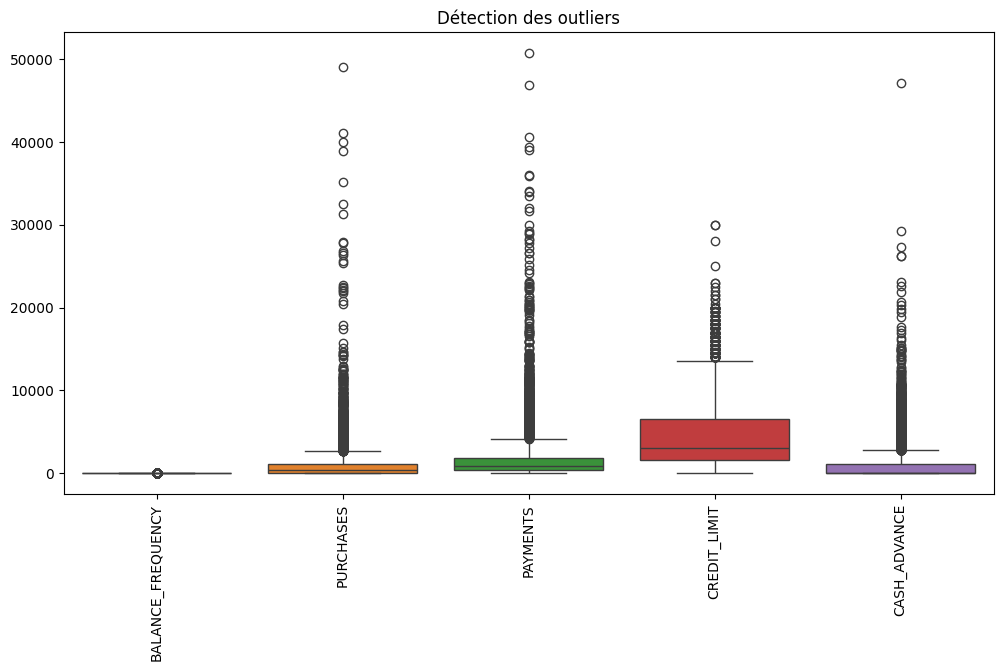

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=DataCredit)
plt.xticks(rotation=90)
plt.title("Détection des outliers")
plt.show()


In [10]:
from pandas_profiling import ProfileReport



# Crée le rapport Pandas Profiling
profile = ProfileReport(DataCredit, title="Profiling Report - Credit Card", explorative=True)

# Sauvegarde le rapport dans un fichier HTML
profile.to_file("/Users/booba/Desktop/mon_environnement/DataCredit_rapport_profiling.html")

/Users/booba/Desktop/script.py/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/fd/b6_hc3516_b4khq0dtrt_gpr0000gn/T/ipykernel_9631/4155898347.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 201.98it/s]


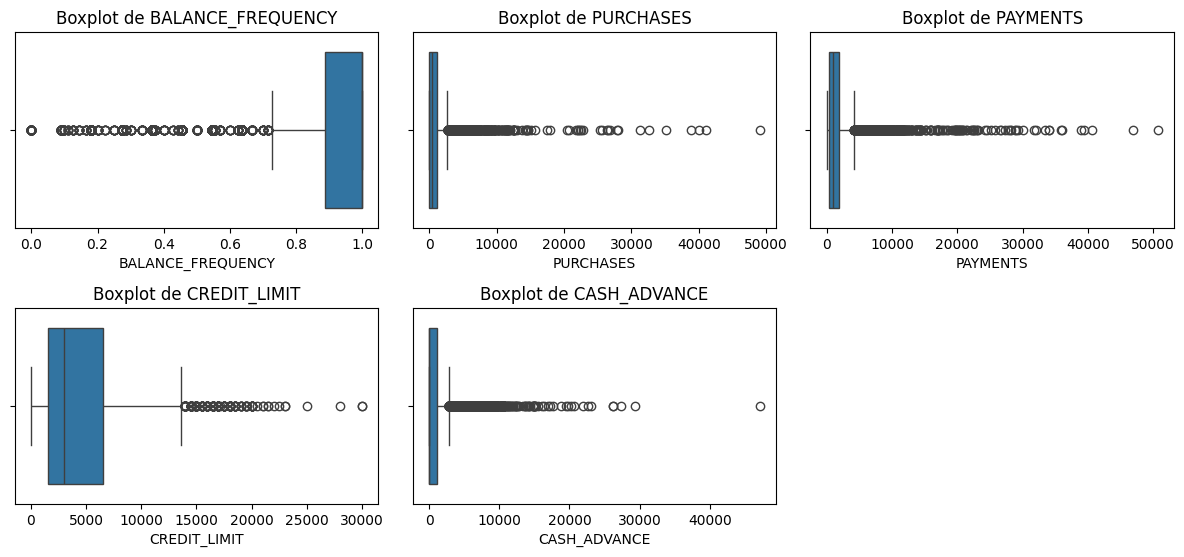

In [30]:
numerical_columns = DataCredit.select_dtypes(include=['float64', 'int64']).columns


plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(x=DataCredit[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

Selon la repartition des Valeurs et le nombre de ces dernieres on va travailler avec tous ces outliers

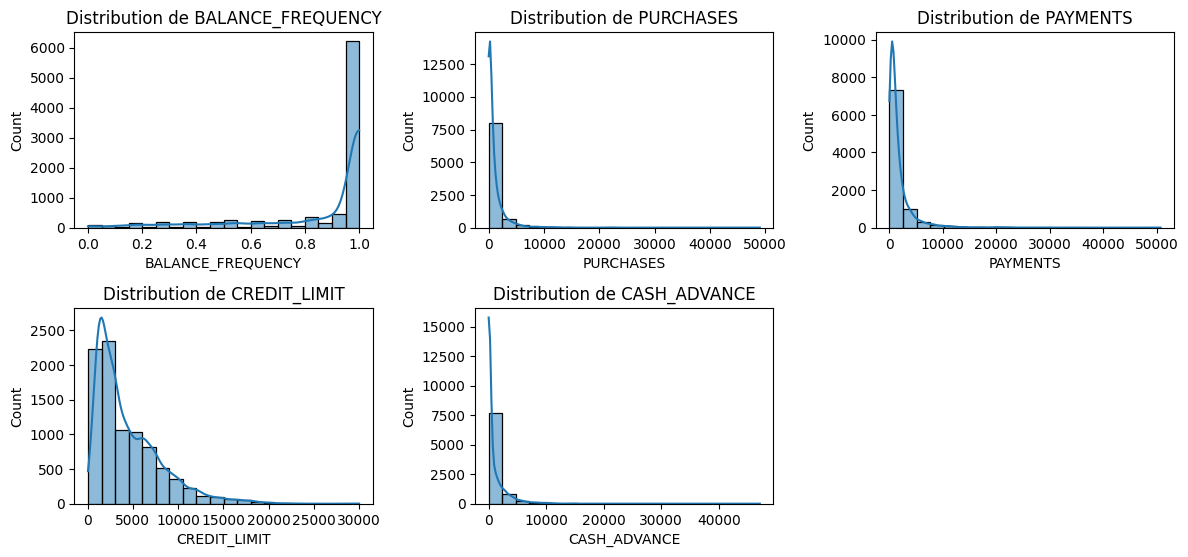

In [31]:
numerical_columns = DataCredit.select_dtypes(include=['float64', 'int64']).columns

# Tracer la distribution des données pour chaque colonne numérique
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Ajuster la disposition des sous-graphes en fonction du nombre de colonnes
    sns.histplot(DataCredit[col], kde=True, bins=20)
    plt.title(f"Distribution de {col}")

plt.tight_layout()
plt.show()

In [32]:
print(DataCredit.columns)

Index(['CUST_ID', 'BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT',
       'CASH_ADVANCE'],
      dtype='object')


In [33]:
DataCredit = DataCredit.dropna().reset_index(drop=True)


In [34]:
DataCredit = DataCredit.drop('CUST_ID', axis=1)


In [35]:
from scipy.stats import zscore
import numpy as  np

z_scores = np.abs(DataCredit.apply(zscore))
outliers = (z_scores > 3)  # Seuil : 3 écarts-types

print(outliers.sum())  # Nombre d'outliers par colonne


BALANCE_FREQUENCY    182
PURCHASES            135
PAYMENTS             159
CREDIT_LIMIT         152
CASH_ADVANCE         182
dtype: int64


In [37]:
print(DataCredit.dtypes)

BALANCE_FREQUENCY    float64
PURCHASES            float64
PAYMENTS             float64
CREDIT_LIMIT         float64
CASH_ADVANCE         float64
dtype: object


In [38]:
print(DataCredit.sample(4))

      BALANCE_FREQUENCY  PURCHASES    PAYMENTS  CREDIT_LIMIT  CASH_ADVANCE
427            1.000000       0.00  357.836436        1800.0     39.646806
5160           0.454545     343.40  347.017230        3000.0      0.000000
699            1.000000     294.13  686.376349        1500.0      0.000000
5354           1.000000    1167.15  704.323375        3000.0    748.152104


je decide de faire un test sur avec ces donner apres si il faut même si le faut on va les enlever 

In [39]:


from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='complete')
clust_labels=model.fit_predict(DataCredit)
agglomerative=pd.DataFrame(clust_labels)
print(agglomerative)

      0
0     2
1     2
2     2
3     2
4     2
...  ..
8944  2
8945  2
8946  2
8947  2
8948  2

[8949 rows x 1 columns]


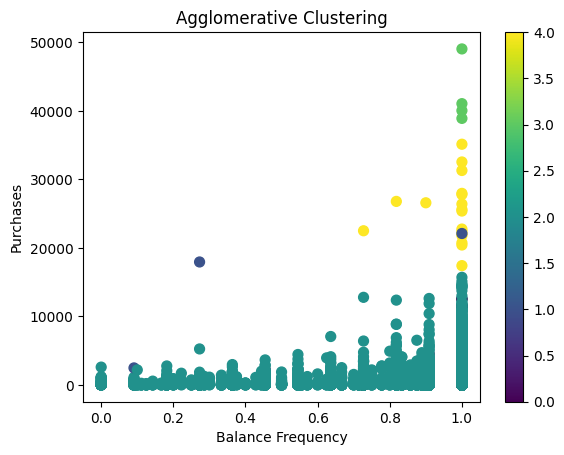

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(x=DataCredit['BALANCE_FREQUENCY'],  
                     y=DataCredit['PURCHASES'],  
                     c=agglomerative[0],  # Couleur des points selon le clustering
                     s=50)  # Taille des points

ax.set_title("Agglomerative Clustering")
ax.set_xlabel("Balance Frequency")
ax.set_ylabel("Purchases")

plt.colorbar(scatter)
plt.show()


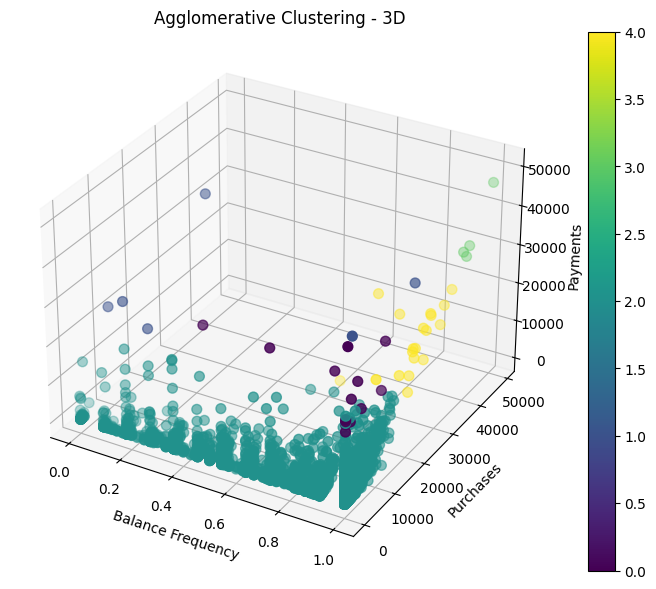

In [41]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')  # Active le mode 3D

scatter = ax.scatter(xs=DataCredit['BALANCE_FREQUENCY'], 
                      ys=DataCredit['PURCHASES'],  
                      zs=DataCredit['PAYMENTS'],  
                      c=agglomerative[0],  
                      s=50)

ax.set_title("Agglomerative Clustering - 3D")
ax.set_xlabel("Balance Frequency")
ax.set_ylabel("Purchases")
ax.set_zlabel("Payments")

plt.colorbar(scatter)
plt.show()


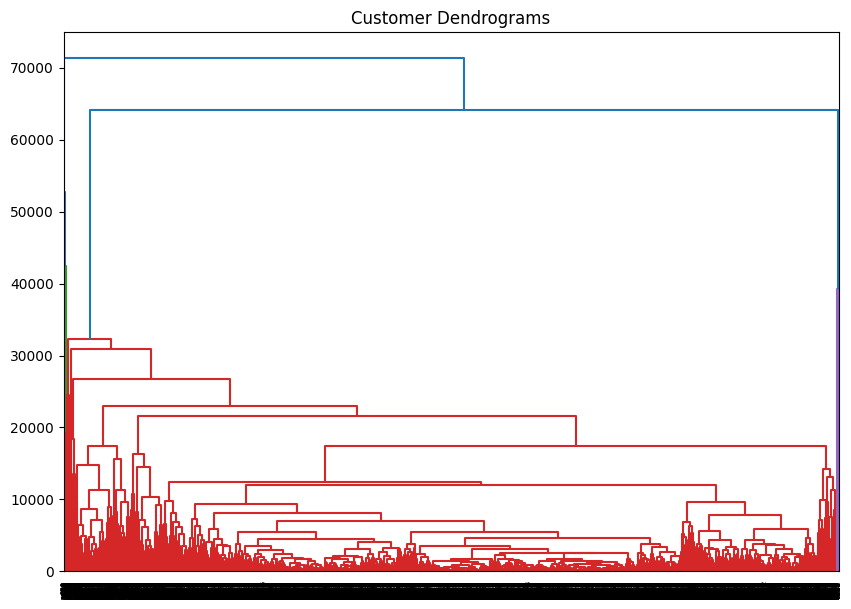

In [42]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(DataCredit, method="complete"))

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from itertools import product

# 🔹 Charger les données (Assurez-vous que DataCredit est défini)
X = DataCredit.copy()

# 🔹 Supprimer les colonnes non numériques si nécessaire
X = X.select_dtypes(include=[np.number])

# 🔹 Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 Définir les hyperparamètres à tester
n_clusters_list = [2, 3, 4, 5, 6]  # Tester différents nombres de clusters
linkage_list = ['ward', 'complete', 'average', 'single']  # Méthodes de linkage
affinity_list = ['euclidean', 'manhattan', 'cosine']  # Métriques de distance

# 🔹 Stocker les scores
results = []

# 🔹 Tester toutes les combinaisons de paramètres
for n_clusters, linkage, affinity in product(n_clusters_list, linkage_list, affinity_list):
    if linkage == "ward" and affinity != "euclidean":
        continue  # Ward ne supporte que euclidean

    model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric=affinity)
    cluster_labels = model.fit_predict(X_scaled)

    # 🔹 Calculer le score de silhouette (uniquement si plus d'un cluster)
    if len(set(cluster_labels)) > 1:
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        results.append((n_clusters, linkage, affinity, silhouette_avg))
        print(f"n_clusters: {n_clusters}, linkage: {linkage}, affinity: {affinity}, silhouette: {silhouette_avg:.4f}")

# 🔹 Trouver la meilleure combinaison
best_params = max(results, key=lambda x: x[3])
print("\n✅ Meilleurs paramètres :", best_params)


n_clusters: 2, linkage: ward, affinity: euclidean, silhouette: 0.3317
n_clusters: 2, linkage: complete, affinity: euclidean, silhouette: 0.8483
n_clusters: 2, linkage: complete, affinity: manhattan, silhouette: 0.8476
n_clusters: 2, linkage: complete, affinity: cosine, silhouette: 0.2077
n_clusters: 2, linkage: average, affinity: euclidean, silhouette: 0.9032
n_clusters: 2, linkage: average, affinity: manhattan, silhouette: 0.9032
n_clusters: 2, linkage: average, affinity: cosine, silhouette: 0.2638
n_clusters: 2, linkage: single, affinity: euclidean, silhouette: 0.9032
n_clusters: 2, linkage: single, affinity: manhattan, silhouette: 0.9032
n_clusters: 2, linkage: single, affinity: cosine, silhouette: -0.3200
n_clusters: 3, linkage: ward, affinity: euclidean, silhouette: 0.3675
n_clusters: 3, linkage: complete, affinity: euclidean, silhouette: 0.8482
n_clusters: 3, linkage: complete, affinity: manhattan, silhouette: 0.7957
n_clusters: 3, linkage: complete, affinity: cosine, silhouette:

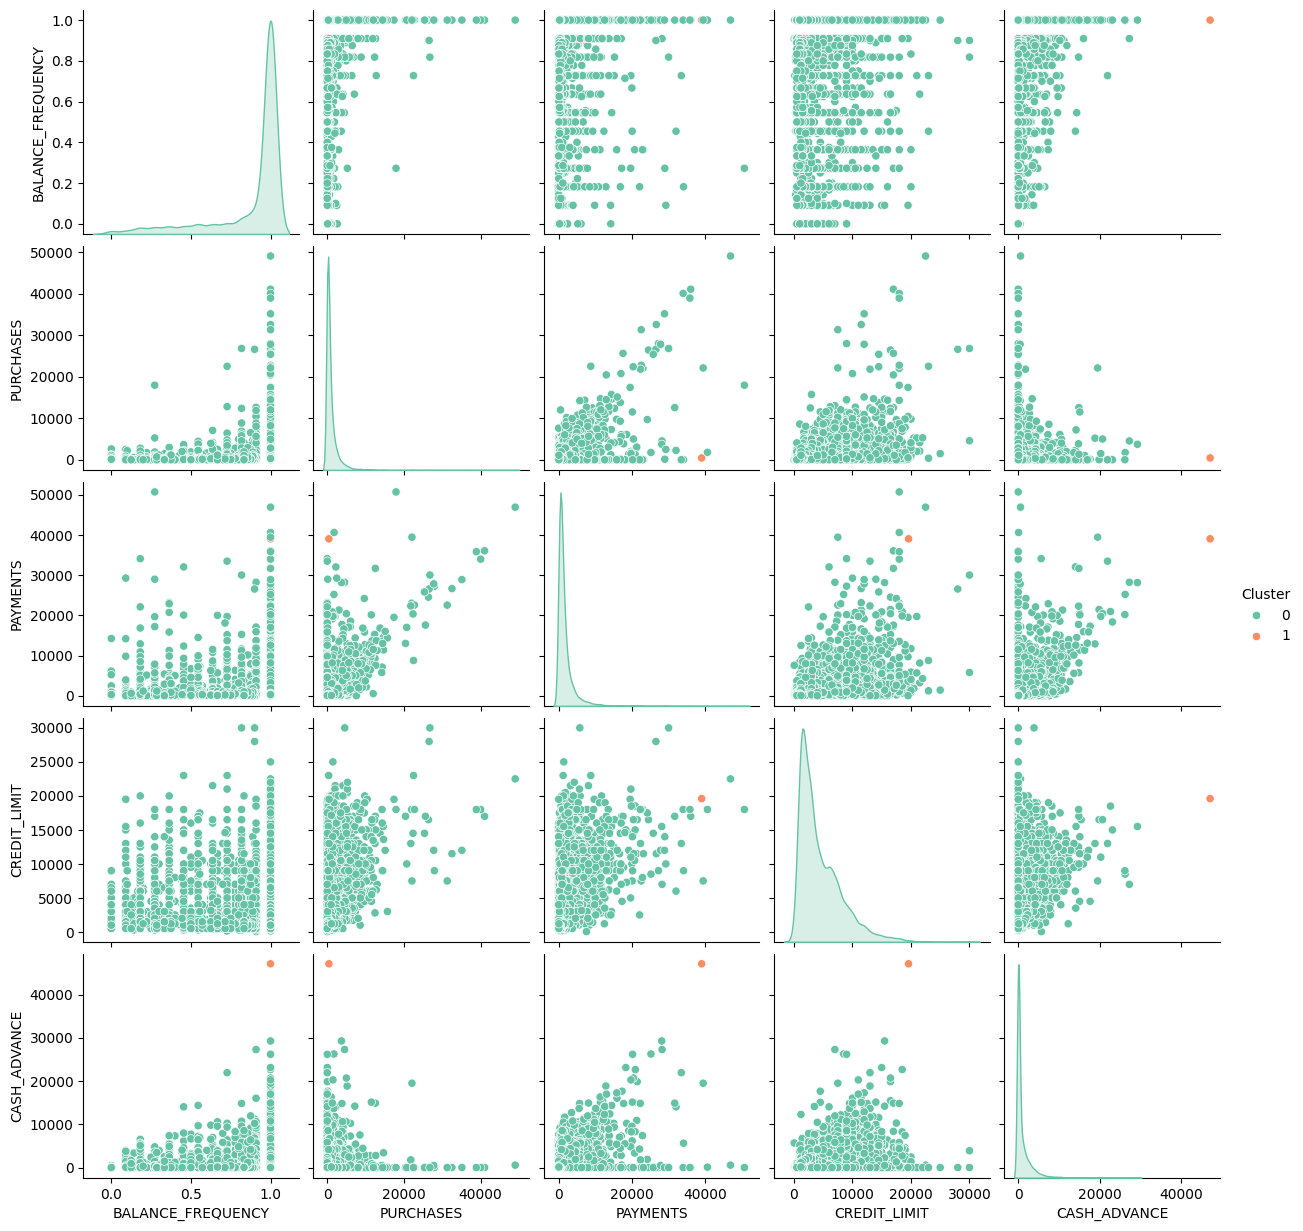


📊 Statistiques moyennes par cluster :
         BALANCE_FREQUENCY    PURCHASES      PAYMENTS  CREDIT_LIMIT  \
Cluster                                                               
0                 0.877336  1003.380792   1729.166276   4492.761302   
1                 1.000000   431.930000  39048.597620  19600.000000   

         CASH_ADVANCE  
Cluster                
0          973.801117  
1        47137.211760  


In [ ]:
# 🔹 Charger les données (Assurez-vous que DataCredit est défini)
X = DataCredit.copy()

# 🔹 Supprimer les colonnes non numériques si nécessaire
X = X.select_dtypes(include=[np.number])

# 🔹 Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Meilleurs paramètres trouvés (exemple)
best_n_clusters = 2
best_linkage = 'average'
best_affinity = 'euclidean'

# 🔹 Appliquer Agglomerative Clustering avec les meilleurs paramètres
best_model = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_affinity)
cluster_labels = best_model.fit_predict(X_scaled)

# 🔹 Ajouter les clusters aux données d'origine
DataCredit["Cluster"] = cluster_labels

# 🔹 Visualisation des clusters avec un pairplot
sns.pairplot(DataCredit, hue="Cluster", palette="Set2")
plt.show()

# 🔹 Afficher les statistiques par cluster
cluster_summary = DataCredit.groupby("Cluster").mean()
print("\n📊 Statistiques moyennes par cluster :")
print(cluster_summary)

# 🔹 Afficher le dendrogramme
plt.figure(figsize=(10, 6))
Z = linkage(X_scaled, method=best_linkage, metric=best_affinity)  # Créer la matrice de liaison
dendrogram(Z, truncate_mode="level", p=10)  # Afficher jusqu'à 10 niveaux pour lisibilité
plt.title("Dendrogramme après Hyperparameter Tuning")
plt.xlabel("Données")
plt.ylabel("Distance")
plt.show()


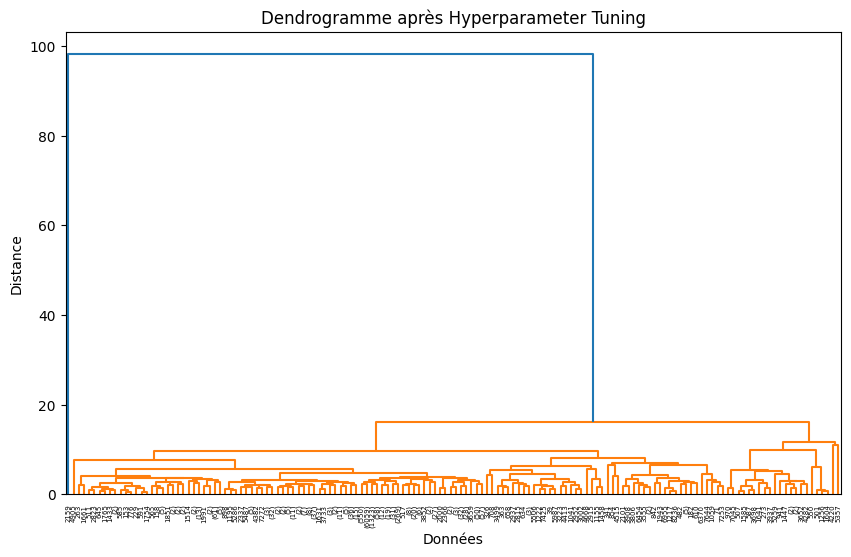

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# 🔹 Charger et préparer les données
X = DataCredit.copy()
X = X.select_dtypes(include=[np.number])  # Supprimer les colonnes non numériques si nécessaire

# 🔹 Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Meilleurs paramètres trouvés (exemple)
best_n_clusters = 2
best_linkage = 'average'
best_affinity = 'euclidean'

# 🔹 Appliquer Agglomerative Clustering avec les meilleurs paramètres
best_model = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_affinity)
cluster_labels = best_model.fit_predict(X_scaled)

# 🔹 Ajouter les clusters aux données d'origine
DataCredit["Cluster"] = cluster_labels

# 🔹 Afficher le dendrogramme
plt.figure(figsize=(10, 6))
Z = linkage(X_scaled, method=best_linkage, metric=best_affinity)  # Créer la matrice de liaison
dendrogram(Z, truncate_mode="level", p=10)  # Afficher jusqu'à 10 niveaux pour lisibilité
plt.title("Dendrogramme après Hyperparameter Tuning")
plt.xlabel("Données")
plt.ylabel("Distance")
plt.show()


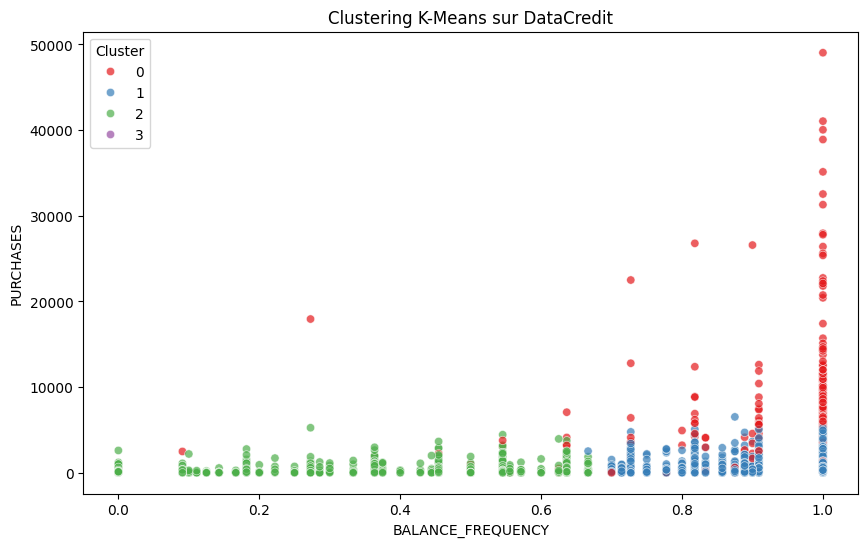


📊 Statistiques moyennes par cluster :
         BALANCE_FREQUENCY    PURCHASES      PAYMENTS  CREDIT_LIMIT  \
Cluster                                                               
0                 0.952029  3204.819926   5941.819659  10262.813674   
1                 0.971081   724.476138   1109.036891   3619.992599   
2                 0.385038   361.274174    894.418058   3455.998962   
3                 1.000000   431.930000  39048.597620  19600.000000   

         CASH_ADVANCE  
Cluster                
0         3500.376382  
1          622.872428  
2          377.419930  
3        47137.211760  


In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 🔹 Charger les données
X = DataCredit.copy()

# 🔹 Supprimer les colonnes non numériques si nécessaire
X = X.select_dtypes(include=[np.number])

# 🔹 Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Appliquer directement K-Means avec un nombre de clusters choisi (ex: k=4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
DataCredit["Cluster"] = kmeans.fit_predict(X_scaled)

# 🔹 Visualisation des clusters (avec 2 variables principales)
plt.figure(figsize=(10,6))
sns.scatterplot(x=DataCredit["BALANCE_FREQUENCY"], 
                y=DataCredit["PURCHASES"], 
                hue=DataCredit["Cluster"], 
                palette="Set1", 
                alpha=0.7)
plt.title("Clustering K-Means sur DataCredit")
plt.xlabel("BALANCE_FREQUENCY")
plt.ylabel("PURCHASES")
plt.legend(title="Cluster")
plt.show()

# 🔹 Afficher les statistiques moyennes par cluster
cluster_summary = DataCredit.groupby("Cluster").mean()
print("\n📊 Statistiques moyennes par cluster :")
print(cluster_summary)


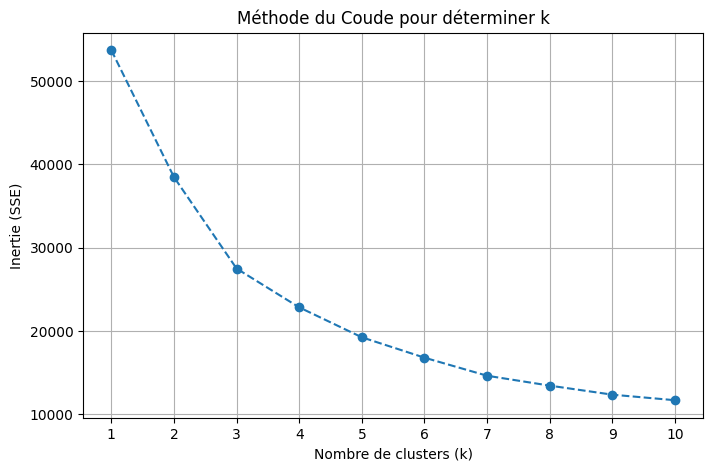

In [52]:
# 🔹 Charger et standardiser les données
X = DataCredit.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 Tester plusieurs valeurs de k
inertia = []
K_range = range(1, 11)  # On teste de 1 à 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # Sauvegarde de l'inertie

# 🔹 Tracer la courbe du coude
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie (SSE)")
plt.title("Méthode du Coude pour déterminer k")
plt.xticks(K_range)
plt.grid(True)
plt.show()

         BALANCE_FREQUENCY     PURCHASES      PAYMENTS  CREDIT_LIMIT  \
Cluster                                                                
0                 0.968011    515.754057    871.407447   2127.906304   
1                 0.947269    675.500930   5904.066343   9216.018865   
2                 0.385038    361.274174    894.418058   3455.998962   
3                 0.977552   1149.050153   1593.944065   6692.799409   
4                 0.948727  27085.309200  27159.043527  16360.000000   
5                 0.955559   4554.273263   5232.277549  10951.292407   

         CASH_ADVANCE  
Cluster                
0          494.032307  
1         6849.433535  
2          377.419930  
3          889.943700  
4         1488.363253  
5          649.387271  


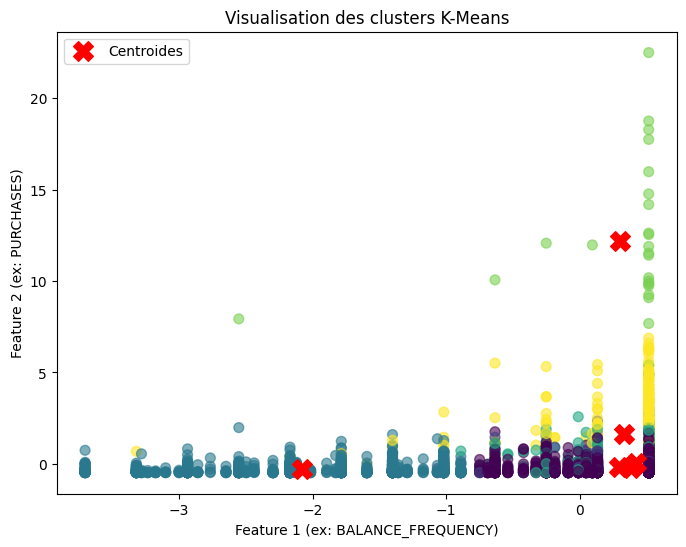

In [53]:
from sklearn.cluster import KMeans

# 🔹 Définir le nombre optimal de clusters (remplace k_optimal par la valeur trouvée avec l'Elbow Method)
k_optimal = 6  # 🔄 Mets ici la valeur trouvée sur ton graphique

# 🔹 Appliquer K-Means
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)  # Prédire les clusters

# 🔹 Ajouter les clusters au DataFrame
DataCredit['Cluster'] = clusters

# 🔹 Afficher les statistiques des clusters
print(DataCredit.groupby('Cluster').mean())

# 🔹 Visualiser les clusters (si données en 2D)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label="Centroides")
plt.title("Visualisation des clusters K-Means")
plt.xlabel("Feature 1 (ex: BALANCE_FREQUENCY)")
plt.ylabel("Feature 2 (ex: PURCHASES)")
plt.legend()
plt.show()


Meilleurs hyperparamètres pour K-Means : {'k': 5, 'init': 'k-means++', 'algorithm': 'lloyd', 'n_init': 20}
Meilleur score de silhouette : 0.542226499141653


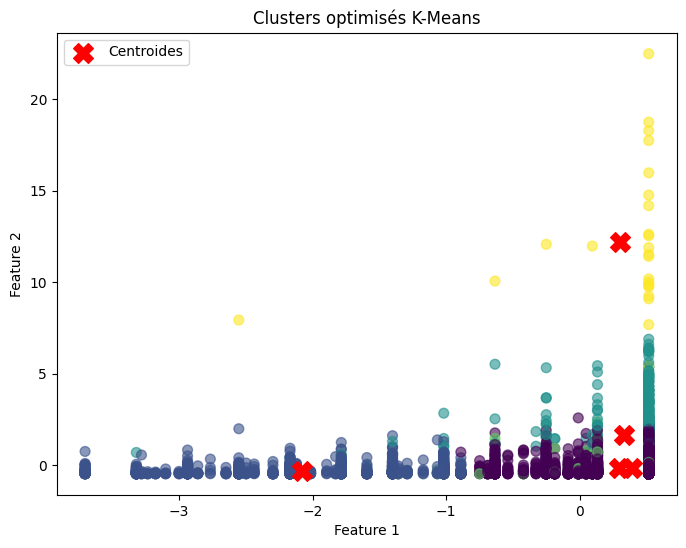

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# 🔹 Tester différents hyperparamètres
best_score = -1
best_params = {}

for k in range(2, 11):  # Tester de 2 à 10 clusters
    for init_method in ['k-means++', 'random']:  # Méthodes d'initialisation
        for algo in ['lloyd', 'elkan']:  # Algorithmes de convergence
            for n_init in [10, 20, 50]:  # Nombre d'initialisations
                
                kmeans = KMeans(n_clusters=k, init=init_method, algorithm=algo, 
                                n_init=n_init, random_state=42)
                labels = kmeans.fit_predict(X_scaled)
                
                # Calculer le score de silhouette
                score = silhouette_score(X_scaled, labels)
                
                # Sauvegarder les meilleurs hyperparamètres
                if score > best_score:
                    best_score = score
                    best_params = {
                        'k': k,
                        'init': init_method,
                        'algorithm': algo,
                        'n_init': n_init
                    }

# 🔹 Afficher les meilleurs paramètres trouvés
print("Meilleurs hyperparamètres pour K-Means :", best_params)
print("Meilleur score de silhouette :", best_score)

# 🔹 Appliquer K-Means avec les meilleurs paramètres
kmeans_best = KMeans(n_clusters=best_params['k'], 
                     init=best_params['init'], 
                     algorithm=best_params['algorithm'], 
                     n_init=best_params['n_init'], 
                     random_state=42)

DataCredit['Cluster'] = kmeans_best.fit_predict(X_scaled)

# 🔹 Visualisation des clusters (si applicable)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=DataCredit['Cluster'], cmap='viridis', s=50, alpha=0.6)
plt.scatter(kmeans_best.cluster_centers_[:, 0], kmeans_best.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label="Centroides")
plt.title("Clusters optimisés K-Means")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [55]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# 📌 Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(DataCredit.drop(columns=["Cluster"], errors='ignore'))

# 📌 Définition des paramètres à tester
k_values = [3, 4, 5, 6, 7]  # Différents nombres de clusters
init_methods = ['k-means++', 'random']
max_iters = [300, 500, 1000]
n_inits = [10, 20, 30]

# 📌 Stocker les résultats
best_score = -1
best_params = None
best_model = None

# 📌 Test manuel des paramètres
for k in k_values:
    for init in init_methods:
        for max_iter in max_iters:
            for n_init in n_inits:
                kmeans = KMeans(n_clusters=k, init=init, max_iter=max_iter, n_init=n_init, random_state=42)
                clusters = kmeans.fit_predict(X_scaled)
                score = silhouette_score(X_scaled, clusters)  # Calcul du Silhouette Score
                
                # Vérifier si ce modèle est le meilleur
                if score > best_score:
                    best_score = score
                    best_params = {'n_clusters': k, 'init': init, 'max_iter': max_iter, 'n_init': n_init}
                    best_model = kmeans

print("Meilleurs paramètres trouvés :", best_params)
print("Meilleur Silhouette Score :", best_score)

# 📌 Application du meilleur modèle
clusters = best_model.fit_predict(X_scaled)

# 📌 Ajout des clusters au dataset
DataCredit["Cluster"] = clusters

# 📌 Visualisation si les données ont 2 dimensions
if X_scaled.shape[1] == 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', edgecolors='k')
    plt.title("K-Means avec les meilleurs paramètres")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
else:
    print("Les données ont plus de 2 dimensions, pas de visualisation 2D possible.")

# 📌 Affichage des statistiques par cluster
print(DataCredit.groupby("Cluster").mean())  
  


Meilleurs paramètres trouvés : {'n_clusters': 3, 'init': 'k-means++', 'max_iter': 300, 'n_init': 10}
Meilleur Silhouette Score : 0.42918400207616114
Les données ont plus de 2 dimensions, pas de visualisation 2D possible.
         BALANCE_FREQUENCY    PURCHASES     PAYMENTS  CREDIT_LIMIT  \
Cluster                                                              
0                 0.385275   363.100251   899.720429   3465.746453   
1                 0.952324  3257.337379  6061.373930  10332.940039   
2                 0.971058   728.079951  1118.386174   3643.945616   

         CASH_ADVANCE  
Cluster                
0          377.369305  
1         3577.962194  
2          631.747839  


une visualisation avec PCA selon chatGTP 

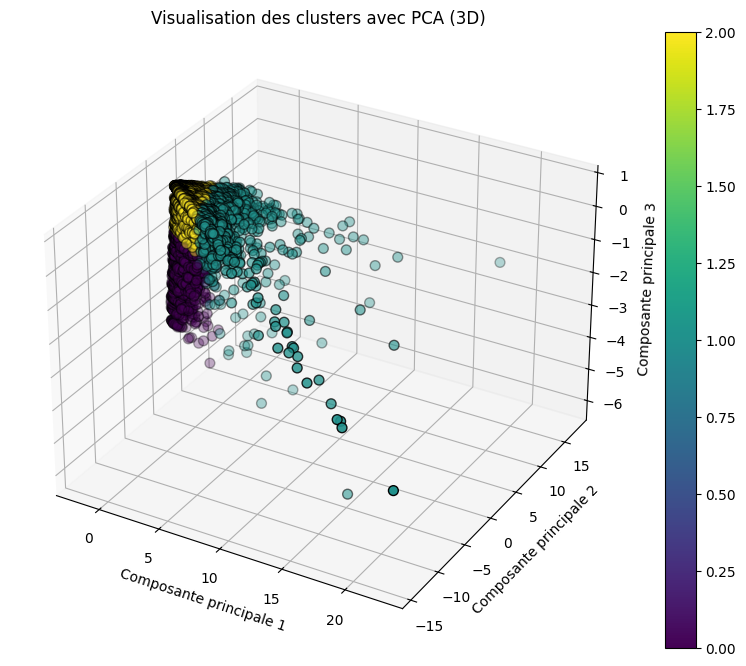

In [56]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 📌 Réduction en 3D avec PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# 📌 Création de la figure 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 📌 Affichage des clusters en 3D
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                      c=clusters, cmap='viridis', edgecolor='k', s=50)

# 📌 Labels et titre
ax.set_title("Visualisation des clusters avec PCA (3D)")
ax.set_xlabel("Composante principale 1")
ax.set_ylabel("Composante principale 2")
ax.set_zlabel("Composante principale 3")

# 📌 Ajout de la légende des couleurs
plt.colorbar(scatter)
plt.show()


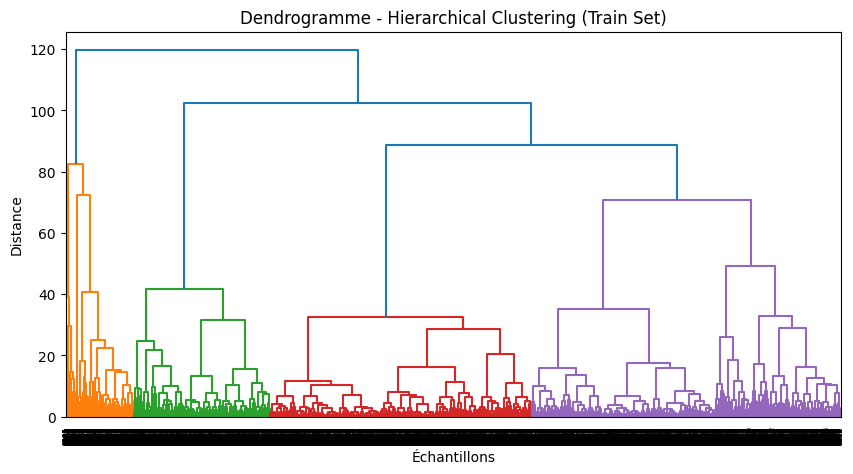

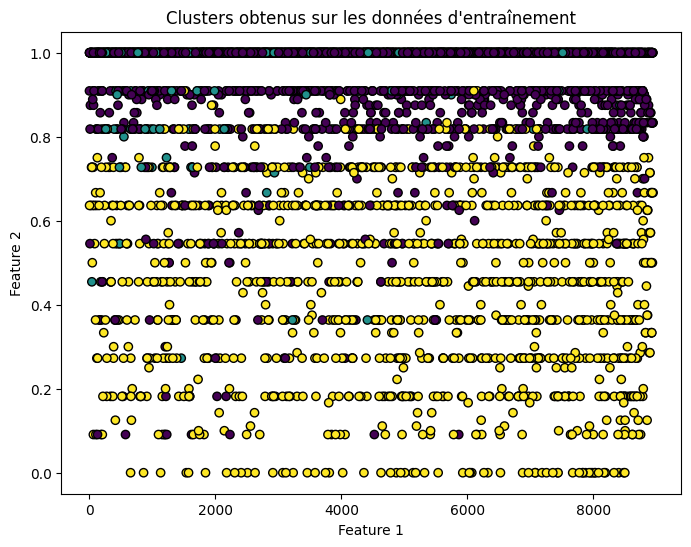

In [72]:
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Préparation de la data
X = DataCredit

# Eliminénation des valeurs null
X = X.dropna()


# 📌 2️⃣ Split en train/test (80% train, 20% test)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# 📌 3️⃣ Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # ⚠️ On utilise transform() et pas fit_transform() pour éviter les biais !

# 📌 4️⃣ Création du linkage pour le dendrogramme (avec les données d'entraînement uniquement)
Z = linkage(X_train_scaled, method='ward')

# Tracer le dendrogramme
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrogramme - Hierarchical Clustering (Train Set)")
plt.xlabel("Échantillons")
plt.ylabel("Distance")
plt.show()

# 📌 5️⃣ Appliquer le clustering
n_clusters = 3  # Nombre de clusters (à choisir en fonction du dendrogramme)
model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters = model.fit_predict(X_train_scaled)

# 📌 6️⃣ Visualisation des clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=clusters, cmap='viridis', edgecolors='k')
plt.title("Clusters obtenus sur les données d'entraînement")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

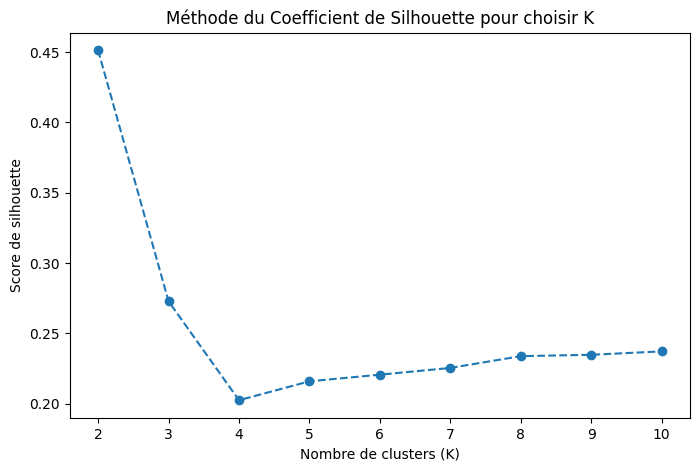

In [73]:
# Choisir le meilleurs K

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_scores = []

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


for k in range(2, 11):  # K commence à 2 (car silhouette_score n'est pas défini pour K=1)
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = model.fit_predict(X_train_scaled)
    silhouette_scores.append(silhouette_score(X_train_scaled, labels))

# 📌 Tracer la courbe du coefficient de silhouette
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel("Nombre de clusters (K)")
plt.ylabel("Score de silhouette")
plt.title("Méthode du Coefficient de Silhouette pour choisir K")
plt.show()


le meilleur K = 4 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# 📌 1️⃣ Charger et standardiser les données
X = DataCredit  # Assurez-vous que DataCredit est un DataFrame avec les bonnes variables

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 2️⃣ Appliquer le clustering avec K=4
model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
clusters = model.fit_predict(X_scaled)

# 📌 3️⃣ Mapper les clusters à des noms plus compréhensibles
cluster_names = {0: "Cluster A", 1: "Cluster B", 2: "Cluster C", 3: "Cluster D"}
DataCredit["Cluster"] = pd.Series(clusters).map(cluster_names)



# 📌 4️⃣ Visualisation des clusters (si X a 2 dimensions)
if X.shape[1] == 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', edgecolors='k')
    plt.title("Clusters obtenus sur les données (K=4)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
else:
    print("Les données ont plus de 2 dimensions, pas de visualisation en 2D.")

# 📌 5️⃣ Affichage des statistiques par cluster
print(DataCredit.groupby("Cluster").mean())  # Moyenne des valeurs par cluster



ValueError: could not convert string to float: 'Cluster C'

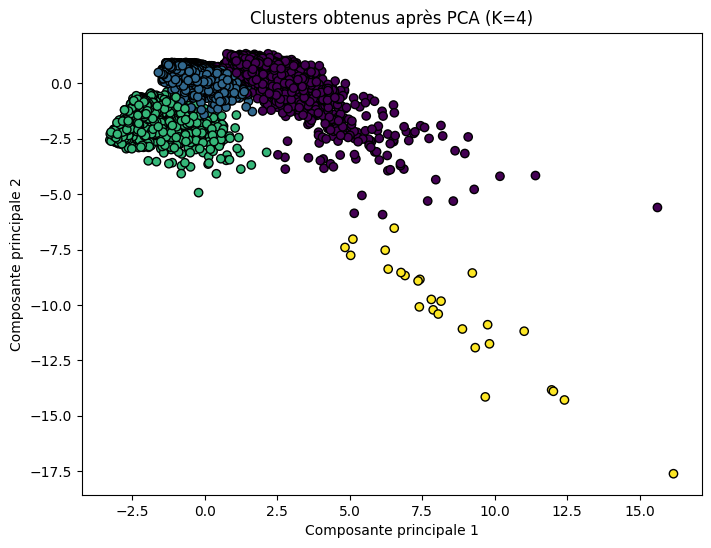

             CUST_ID  BALANCE_FREQUENCY     PURCHASES      PAYMENTS  \
Cluster                                                               
0        2928.747302           0.966739   2462.063340   4403.445368   
1        4736.303809           0.978475    665.618078   1074.918626   
2        5082.455049           0.433054    370.875585   1061.742410   
3        2328.423077           0.950699  26485.910385  26888.388216   

         CREDIT_LIMIT  CASH_ADVANCE  
Cluster                              
0         9716.987013   2598.146203  
1         3240.548885    685.554497  
2         3660.512172    426.214764  
3        16269.230769   2013.177441  


In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 📌 Charger et standardiser les données
X = DataCredit.copy()  # Copie pour éviter de modifier l'original

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 Appliquer le clustering avec K=4
model = AgglomerativeClustering(n_clusters=4, linkage='ward')
clusters = model.fit_predict(X_scaled)

# 📌 Ajouter les clusters au dataset
DataCredit["Cluster"] = clusters

# 📌 Visualisation des clusters
if X.shape[1] == 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', edgecolors='k')
    plt.title("Clusters obtenus sur les données (K=4)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
else:
    # 📌 Réduction de dimension avec PCA si X a plus de 2 dimensions
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolors='k')
    plt.title("Clusters obtenus après PCA (K=4)")
    plt.xlabel("Composante principale 1")
    plt.ylabel("Composante principale 2")
    plt.show()

# 📌 Affichage des statistiques par cluster
print(DataCredit.groupby("Cluster").mean())  # Moyenne des valeurs par cluster
